## C01 - Using Probability Distributions as Parameters.ipynb
https://github.com/aleju/imgaug-doc/blob/master/notebooks/C01%20-%20Using%20Probability%20Distributions%20as%20Parameters.ipynb

In [1]:
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug import parameters as iap

np.set_printoptions(precision=2, linewidth=125, suppress=False)
ia.seed(1)

aug = iaa.Multiply(mul=1)
print(aug.mul)

aug = iaa.Multiply(mul=(0.5, 1.5))
print(aug.mul)

aug = iaa.Multiply(mul=[0.5, 1.0, 1.5])
print(aug.mul)


Deterministic(int 1)
Uniform(Deterministic(float 0.50000000), Deterministic(float 1.50000000))
Choice(a=[0.5, 1.0, 1.5], replace=True, p=None)


In [2]:
aug = iaa.Multiply(mul=iap.Deterministic(1))
print(aug.mul)



Deterministic(int 1)


In [3]:


print(iap.Deterministic(1).draw_samples(10))
print(iap.Deterministic(1).draw_samples(10, random_state=1))
print(iap.Deterministic(1).draw_samples(10, random_state=1))
print(iap.Deterministic(1).draw_samples(10, random_state=2))



[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]


In [4]:
print(iap.DeterministicList([1, 2, 3, 4]).draw_samples(20))
print(iap.DeterministicList([1, 2, 3, 4]).draw_samples(20, random_state=1))
print(iap.DeterministicList([1, 2, 3, 4]).draw_samples(20, random_state=1))
print(iap.DeterministicList([1, 2, 3, 4]).draw_samples(20, random_state=2))

[1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
[1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
[1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
[1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]


In [5]:


print(iap.Uniform(0, 1.0).draw_samples(10))
print(iap.Uniform(0, 1.0).draw_samples(10, random_state=1))
print(iap.Uniform(0, 1.0).draw_samples(10, random_state=1))
print(iap.Uniform(0, 1.0).draw_samples(10, random_state=2))



[0.83 0.83 0.88 0.29 0.2  0.79 0.34 0.31 0.83 0.56]
[0.43 0.76 0.83 0.83 0.88 0.29 0.2  0.79 0.34 0.31]
[0.43 0.76 0.83 0.83 0.88 0.29 0.2  0.79 0.34 0.31]
[0.89 0.09 0.61 0.64 0.33 0.8  0.19 0.1  0.01 0.7 ]


In [6]:
print(iap.Choice([0, 0.5, 1.0]).draw_samples(10))
print(iap.Choice([0, 0.5, 1.0]).draw_samples(10, random_state=1))
print(iap.Choice([0, 0.5, 1.0]).draw_samples(10, random_state=1))
print(iap.Choice([0, 0.5, 1.0]).draw_samples(10, random_state=2))

[0.5 0.5 0.  0.5 0.  1.  0.  0.5 0.  1. ]
[0.5 1.  0.5 0.5 0.5 0.5 1.  1.  1.  1. ]
[0.5 1.  0.5 0.5 0.5 0.5 1.  1.  1.  1. ]
[0.5 1.  0.  0.  0.  1.  0.  0.  0.5 0.5]


In [7]:


uniform = iap.Uniform(-2, 2)
print(uniform.draw_samples(15))
print(iap.Clip(uniform, -1, None).draw_samples(15))
print(iap.Clip(uniform, None, 1).draw_samples(15))
print(iap.Clip(uniform, -1, 1).draw_samples(15))



[ 0.59 -1.27  0.99 -1.14 -1.62  0.22 -0.15 -0.33 -1.1   1.9  -0.28 -1.39 -1.23 -0.77  0.11]
[ 1.6   0.71 -1.   -1.   -1.   -1.   -0.93  0.83 -1.   -0.53 -1.   -0.49 -0.54 -0.61  0.45]
[ 1.   -1.35 -1.25 -0.59  0.33 -0.59  1.   -0.16  1.   -0.62 -0.17  1.   -1.74  0.71 -0.34]
[ 1.    1.   -1.    1.    0.48  0.84 -0.1   0.69  0.   -1.   -0.89 -1.    1.    1.   -1.  ]


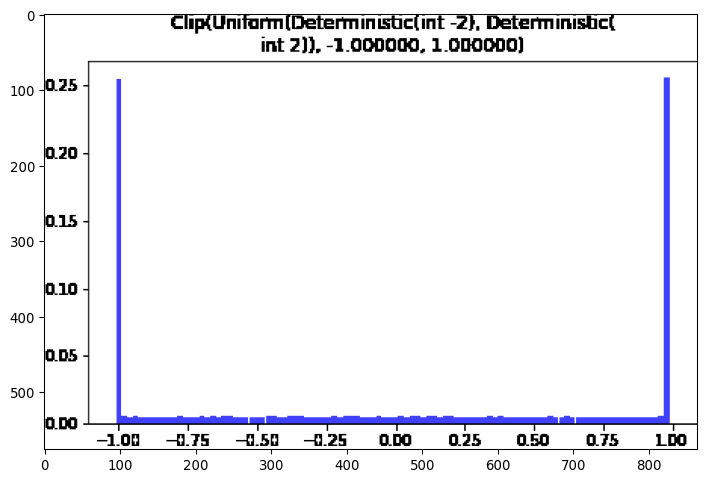

In [8]:


plot = iap.Clip(uniform, -1, 1).draw_distribution_graph()
plot_large = ia.imresize_single_image(plot, 2.0)
ia.imshow(plot_large)



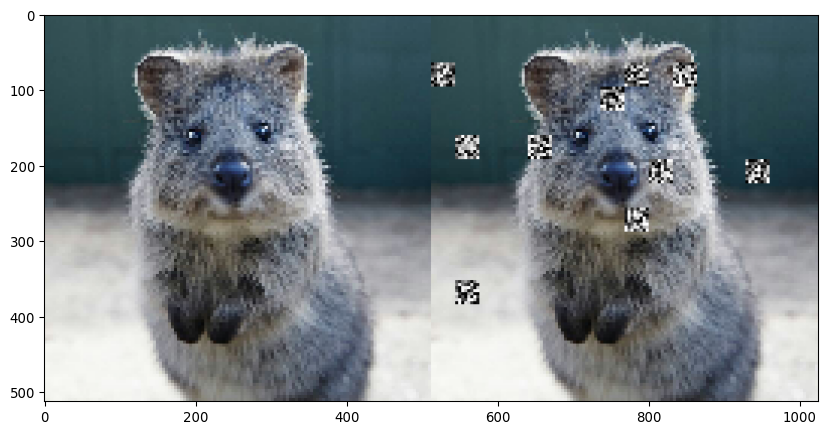

In [9]:
def apply_coarse_salt_and_pepper(image, p, size_px):
    # mask where to replace
    mask = iap.Binomial(p)
    
    # make the mask coarser
    mask_coarse = iap.FromLowerResolution(other_param=mask, size_px=size_px)

    # the noise to use as replacements, mostly close to 0.0 and 1.0
    replacement = iap.Beta(0.5, 0.5)
    
    # project noise to uint8 value range
    replacement = replacement * 255

    # replace masked areas with noise
    return iaa.ReplaceElementwise(
        mask=mask_coarse,
        replacement=replacement
    )(image=image)

image = ia.quokka_square(size=(128, 128))  # example images
image_aug = apply_coarse_salt_and_pepper(image, 0.05, 16)  # apply noise
ia.imshow(
    ia.imresize_single_image(
        np.hstack([image, image_aug]),
        4.0
    )
)

## C02 - Using imgaug with more Control Flow.ipynb
https://github.com/aleju/imgaug-doc/blob/master/notebooks/C02%20-%20Using%20imgaug%20with%20more%20Control%20Flow.ipynb

Before:


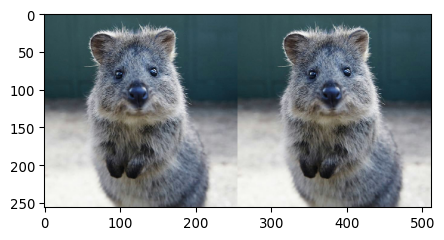

After:


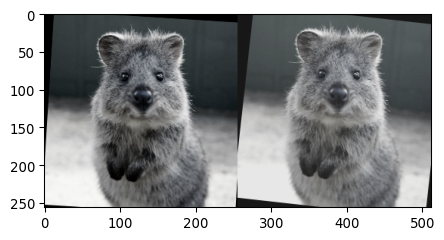

In [10]:
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa
%matplotlib inline

ia.seed(3)

class AugSequence:
    def __init__(self):
        # instantiate each augmenter and save it to its own variable
        self.affine = iaa.Affine(rotate=(-20, 20), translate_px={"x": (-10, 10), "y": (-5, 5)})
        self.multiply = iaa.Multiply((0.9, 1.1))
        self.contrast = iaa.LinearContrast((0.8, 1.2))
        self.gray = iaa.Grayscale((0.0, 1.0))
    
    def augment_images(self, x):
        # apply each augmenter on its own, one by one
        x = self.affine(images=x)
        x = self.multiply(images=x)
        x = self.contrast(images=x)
        x = self.gray(images=x)
        return x

aug = AugSequence()

image = ia.quokka_square(size=(256, 256))  # uint8 array of shape (256, 256, 3)
images_aug = aug.augment_images([image, image])

print("Before:")
ia.imshow(np.hstack([image, image]))
print("After:")
ia.imshow(np.hstack(images_aug))

Before:


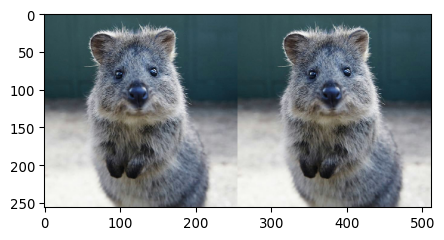

After:


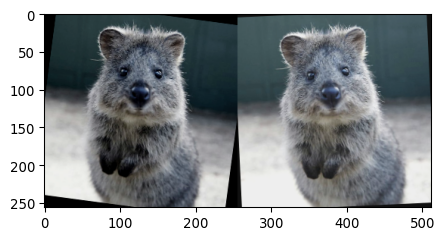

In [11]:


ia.seed(3)
    
def augment_images(x):
    x = iaa.Affine(rotate=(-20, 20))(images=x)
    x = iaa.Multiply((0.9, 1.1))(images=x)
    x = iaa.LinearContrast((0.8, 1.2))(images=x)
    x = iaa.Grayscale((0.0, 1.0))(images=x)
    return x

images_aug = augment_images([image, image])

print("Before:")
ia.imshow(np.hstack([image, image]))
print("After:")
ia.imshow(np.hstack(images_aug))



In [12]:
#%timeit -n 10000 iaa.Affine(translate_px=(-10, 10), scale=(0.9, 1.1), rotate=(-20, 20), shear=(-20, 20), mode=ia.ALL)
#40.6 µs ± 164 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

In [13]:
#%timeit -n 2500 aug.augment_images([image, image])
#%timeit -n 2500 augment_images([image, image])

## 3.66 ms ± 34.1 µs per loop (mean ± std. dev. of 7 runs, 2500 loops each)
## 3.63 ms ± 29.7 µs per loop (mean ± std. dev. of 7 runs, 2500 loops each)

Before:


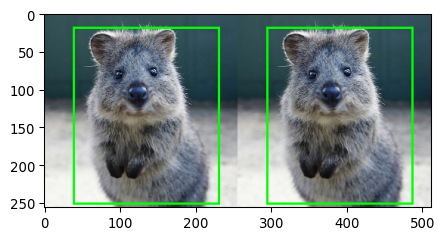

After:


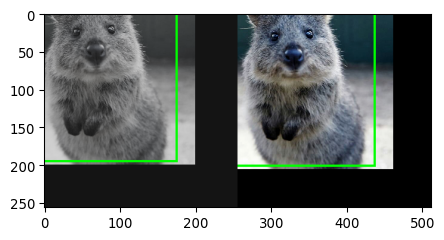

In [14]:
def augment_images(x, seed):
    x = iaa.Affine(translate_px=(-60, 60), random_state=seed)(images=x)
    x = iaa.Multiply((0.9, 1.1), random_state=seed)(images=x)
    x = iaa.LinearContrast((0.8, 1.2), random_state=seed)(images=x)
    x = iaa.Grayscale((0.0, 1.0), random_state=seed)(images=x)
    return x

# new function
def augment_bounding_boxes(x, seed):
    x = iaa.Affine(translate_px=(-60, 60), random_state=seed)(bounding_boxes=x)
    x = iaa.Multiply((0.9, 1.1), random_state=seed)(bounding_boxes=x)
    x = iaa.LinearContrast((0.8, 1.2), random_state=seed)(bounding_boxes=x)
    x = iaa.Grayscale((0.0, 1.0), random_state=seed)(bounding_boxes=x)
    return x

# bounding boxes to augment
bbsoi = ia.BoundingBoxesOnImage(
    bounding_boxes=[ia.BoundingBox(x1=40, y1=20, x2=230, y2=250)],
    shape=image.shape)

# augment images and bounding boxes
images_aug = augment_images([image, image], seed=2)
bbsois_aug = augment_bounding_boxes([bbsoi, bbsoi], seed=2)

print("Before:")
ia.imshow(
    np.hstack([
        bbsoi.draw_on_image(image, size=3),
        bbsoi.draw_on_image(image, size=3),
    ])
)

print("After:")
ia.imshow(
    np.hstack([
        bbsois_aug[0].draw_on_image(images_aug[0], size=3),
        bbsois_aug[1].draw_on_image(images_aug[1], size=3)
    ])
)

## C04 - Copying Random States and Using Multiple Augmentation Sequences.ipynb
https://github.com/aleju/imgaug-doc/blob/master/notebooks/C04%20-%20Copying%20Random%20States%20and%20Using%20Multiple%20Augmentation%20Sequences.ipynb
    

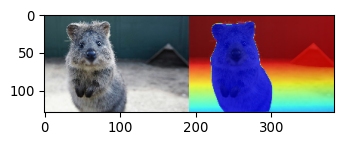

image min: 0.00, max: 255.00
heatmap min: 0.00, max: 1.00


In [15]:
import numpy as np
import imgaug as ia
%matplotlib inline
ia.seed(1)

# load image + heatmap
image = ia.quokka(size=0.2)  # uint8 array
heatmap = ia.quokka_heatmap(size=0.2)  # HeatmapsOnImage object, contains a float array

# show image + heatmap
ia.imshow(np.hstack([image, heatmap.draw_on_image(image)[0]]))

# print min/max of value ranges
print("image min: %.2f, max: %.2f" % (np.min(image), np.max(image)))
print("heatmap min: %.2f, max: %.2f" % (np.min(heatmap.get_arr()), np.max(heatmap.get_arr())))

image min: 0.00, max: 255.00
heatmap min: -85.52, max: 75.42


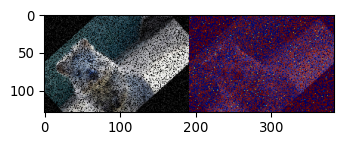

In [16]:
import imgaug.augmenters as iaa

# our augmentation sequence: affine rotation, dropout, gaussian noise
augs = iaa.Sequential([
    iaa.Affine(rotate=(-45, 45)),
    iaa.Dropout(0.2),
    iaa.AdditiveGaussianNoise(scale=20)
])

# apply to image + heatmap
augs_det = augs.to_deterministic()
image_aug = augs_det(image=image)
heatmap_aug = augs_det(image=heatmap.get_arr())

# print min/max of value ranges
print("image min: %.2f, max: %.2f" % (np.min(image_aug), np.max(image_aug)))
print("heatmap min: %.2f, max: %.2f" % (np.min(heatmap_aug), np.max(heatmap_aug)))

# show results
ia.imshow(np.hstack([
    image_aug,
    ia.HeatmapsOnImage(
        np.clip(heatmap_aug, 0.0, 1.0),
        shape=image_aug.shape
    ).draw_on_image(image_aug)[0]
]))


image min: 0.00, max: 255.00
heatmap min: -0.07, max: 1.06


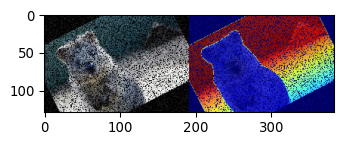

In [17]:


import imgaug.parameters as iap

# Ensure that all augmenters in 'augs' use their own random number generators,
# instead of using a global (shared) random number generator.
augs = augs.localize_random_state(recursive=True)

# Now copy augs to create an augmentation sequence for heatmaps.
# This also copies all random number generators, which means that the
# augmenters will sample the same random numbers.
augs_heatmap = augs.deepcopy()

# Reduce the scale for heatmaps to `0.001 * scale_for_images`.
# Here, this is the same as
#   augs_heatmap[2].value.scale.value = iap.Deterministic(0.2)
# because the scale was defined above as scale=20 and hence was a deterministic value.
# Note that it would be .value.scale.value and not just .scale, because AdditiveGaussianNoise
# returns an instance of AddElementwise, which adds values sampled from .value to images,
# where .value is a gaussian distribution with .value.scale.value.
augs_heatmap[2].value = iap.Multiply(augs_heatmap[2].value, 0.001)

# Augment images and heatmaps.
# We can skip here calling to_deterministic(), as both sequences
# already use the exactly same random number generators.
image_aug = augs(image=image)
heatmap_aug = augs_heatmap(image=heatmap.get_arr())
print("image min: %.2f, max: %.2f" % (np.min(image_aug), np.max(image_aug)))
print("heatmap min: %.2f, max: %.2f" % (np.min(heatmap_aug), np.max(heatmap_aug)))

ia.imshow(np.hstack([
    image_aug,
    ia.HeatmapsOnImage(
        np.clip(heatmap_aug, 0.0, 1.0),
        shape=image_aug.shape
    ).draw_on_image(image_aug)[0]
]))



image min: 0.00, max: 255.00
heatmap min: -0.07, max: 1.06


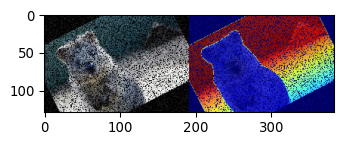

In [18]:
# Create image-specific augmentation sequence.
# Give each augmenter its own name.
sequence_images = iaa.Sequential([
    iaa.Affine(rotate=(-45, 45), name="affine"),
    iaa.Dropout(0.2, name="dropout"),
    iaa.AdditiveGaussianNoise(scale=20, name="gauss-noise")
])

# Create heatmap-specific augmentation sequence.
# Make sure that the names are the same for augmenters that are supposed to be aligned!
# Note how the scale of AdditiveGaussianNoise is much lower than in the image-specific sequence.
sequence_heatmaps = iaa.Sequential([
    iaa.Affine(rotate=(-45, 45), name="affine"),
    iaa.Dropout(0.2, name="dropout"),
    iaa.AdditiveGaussianNoise(scale=0.02, name="gauss-noise")  # different!
])

# Copy once the random states between the sequences by name.
# As before, first make sure that the source augmentation sequence
# uses its own random states instead of global (shared) random states.
# Now both sequences will follow the same sampling behaviour.
sequence_images = sequence_images.localize_random_state(recursive=True)
sequence_heatmaps_det = sequence_heatmaps.copy_random_state(sequence_images, matching="name")

# We can skip deterministic mode again, because both sequences have the same
# random states anyways.
image_aug = sequence_images(image=image)
heatmap_aug = sequence_heatmaps(image=heatmap.get_arr())
print("image min: %.2f, max: %.2f" % (np.min(image_aug), np.max(image_aug)))
print("heatmap min: %.2f, max: %.2f" % (np.min(heatmap_aug), np.max(heatmap_aug)))

ia.imshow(np.hstack([
    image_aug,
    ia.HeatmapsOnImage(
        np.clip(heatmap_aug, 0.0, 1.0),
        shape=image_aug.shape
    ).draw_on_image(image_aug)[0]
]))

image min: 0.00, max: 255.00
heatmap min: -0.08, max: 1.04


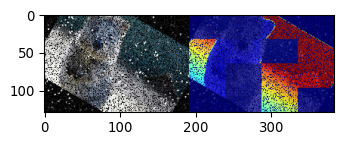

In [19]:
ia.seed(1)  # to make Snowflakes reproducible

# Image-specific sequence.
sequence_images = iaa.Sequential([
    iaa.Affine(rotate=(-45, 45), random_state=1),
    iaa.Snowflakes(),  # added!
    iaa.Dropout(0.2, random_state=2),
    iaa.AdditiveGaussianNoise(scale=20, random_state=3)
], random_state=4)

# Heatmap-specific sequence.
# Make sure to use the same random state seeds as above.
sequence_heatmaps = iaa.Sequential([
    iaa.Affine(rotate=(-45, 45), random_state=1),
    iaa.Dropout(0.2, random_state=2),
    iaa.CoarseDropout(0.2, size_px=4, random_state=100),  # added!
    iaa.AdditiveGaussianNoise(scale=0.02, random_state=3)
], random_state=4)

# We can skip deterministic mode again, because both sequences have the same
# random states anyways.
image_aug = sequence_images(image=image)
heatmap_aug = sequence_heatmaps(image=heatmap.get_arr())
print("image min: %.2f, max: %.2f" % (np.min(image_aug), np.max(image_aug)))
print("heatmap min: %.2f, max: %.2f" % (np.min(heatmap_aug), np.max(heatmap_aug)))

ia.imshow(np.hstack([
    image_aug,
    ia.HeatmapsOnImage(
        np.clip(heatmap_aug, 0.0, 1.0),
        shape=image_aug.shape
    ).draw_on_image(image_aug)[0]
]))